# 1. Introducere Teoretica:

## 1.1 Conceptul de imagini hiperspectrale si aplicatii:

### Ce sunt imaginile hiperspectrale?

- Sunt reprzentari complexe ale unei scene ce masoare reflectanta sau emisia la multiple lungimi de unda.
- Spre deosebire de imaginile RGB (3 canale de culoare), acestea captureaza informatii in sute de benzi spectrale, oferind un spectru complet pe fiecare pixel.

### Caracteristici:

- Dimensiune mare: Fiecare pixel are sute de caracteristici (benzi spectrale)
- Detalii spectrale fine: Permit identificarea materialelor bazate pe semnatura spectrala specifica

### Exemple si aplicatii:

#### 1. Agricultura:

- detectia bolilor plantelor
- monitorizarea sanatatii cultutilor
- evaluarea continutului de apa

#### 2. Senzori de la distanta (remote sensing):

- clasificarea terenurilor (apa, paduri, culturi)
- identificarea poluarii, minereurilor

#### 3. Medicina:

- diagnosticare bazata pe spectrul tesuturilor

#### 4. Aplicatii militare:

- detectarea obiectelor camuflate sau a armelor

## 1.2 Principiile metodelor supervizate alese:

### Support Vector Machines (SVM):

- Principiu: Creeaza un hiperplan care separa datele in clase distincte, maximizand marginea dintre acestea
- Kernel Trick: Permite clasificarea datelor ce nu sunt liniar separatbile, transformandu-le intr-un spatiu dimensional mai mare
- Aplicatii: Probleme de clasificare binara sau multi-clasa precum recunoasterea imaginilor sau analiza textelor

#### Avantaje:

- Performante bune pentru seturi de date de dimensiuni mari si cu putine exemple.
- Robust la zgomot
- Abil pe setul de date liniar separabile

#### Dezavantaje

- Lent si consuma multa memorie
- Dificulatati in alegerea parametrilor (Kernel, C, gamma)

### Retele Neuronale (NN):

#### Principiu:
Modeleaza relatii complexe dintre date folosind straturi de neuroni:

- Input Layer: caracteristicile de intrare
- Hidden Layer: invata reprezentari intermediare complexe
- Output Layer: furnizeaza predictia

#### Antrenarea:
Foloseste backpropagation si minimizeaza diferenta intre output-ul retelei si datele de antrenare folosint optimizarea gradientului

#### Aplicatii:
- Recunoasterea imaginilor
- Procesarea limbajului natural
- Predictii complexe

#### Avantaje:

- Capacitate de a amodela relatii complexe si neliniare.
- Scalabilitate pe seturi de date mari.
- Adaptabila pentru diverse probleme (Clasificare, Regresie, Segmentare)

#### Dezavantaje:

- Pentru buna performanta, necesita un numar mare de date.
- Consum ridicat de resurse
- Risc de supra-antrenare daca nu e reglat corect.


# 2. Preprocesare si Vizualizare:




## 2.1 Descarcarea si Incarcarea setului de date:

- pavia_date incarca datele hiperspectrale din PaviaU-2.mat sub forma de cub 3D

- pavia_etichete incarca etichetele (ground_truth) din PaviaU_gt.mat sub forma de matrice 2D.

- fiecare pixel e o eticheta intre 0 si 9 (clasele diferite), 0 indica fundalul

In [15]:
from scipy.io import loadmat # folsit pentru a incarca fisiere .mat (Matlab)
import matplotlib.pyplot as plt # manipulare numerica de date
import numpy as np # vizualizare date

# Calea catre fisiere:
cale_date = '/content/Pavia_Dataset/'

# Incarcare fisiere:
pavia_date = loadmat(cale_date + 'PaviaU-2.mat')['paviaU']
pavia_etichete = loadmat(cale_date + 'PaviaU_gt.mat')['paviaU_gt']

# Afisarea dimensiunilor:
print(f"Dimensiunile datelor hiperspectrale: {pavia_date.shape} (Inaltime, Latime, Benzi Spectrale)")
print(f"Dimensiunile etichetelor: {pavia_etichete.shape} (Inaltime, Latime)")


Dimensiunile datelor hiperspectrale: (610, 340, 103) (Inaltime, Latime, Benzi Spectrale)
Dimensiunile etichetelor: (610, 340) (Inaltime, Latime)


## 2.2 Vizualizarea datelor:

- vizualizarea unei benzi spectrale (de exemplu banda 1)

- vizualizarea etichetelor (ground truth)

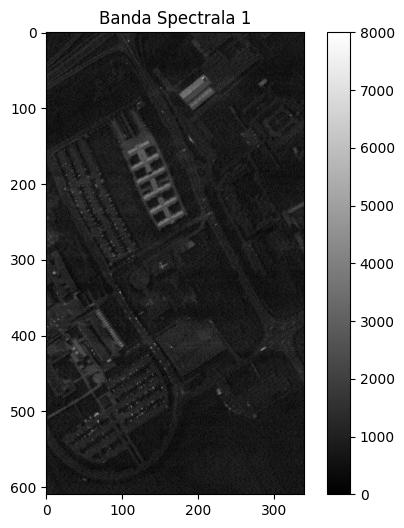

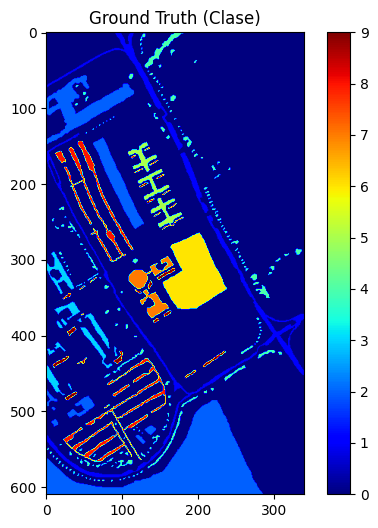

In [16]:
# viz. banda spectrala
plt.figure(figsize=(6, 6))
plt.imshow(pavia_date[:, :, 0], cmap='gray')
plt.title("Banda Spectrala 1")
plt.colorbar()
plt.show()

# viz. etichetelor (ground truth)
plt.figure(figsize=(6, 6))
plt.imshow(pavia_etichete, cmap='jet')
plt.title("Ground Truth (Clase)")
plt.colorbar()
plt.show()

## 2.3 Preprocesarea Datelor:

### 1. Reshape pentru procesare:

- transformam cubul 3D in 2D (pixeli x benzi)
- X_date : caracteristicile (spectrale) ale fiecarui pixel
- y_etichete : etichetele corespunzatoare fiecarui pixel

### 2. Normalizarea:

- MinMaxScalar : transforma valorile intre 0 si 1, prin urmare datele devin uniforme

### 3. Reducere Dimensionala (PCA):

- n_components = 10 : reducem datele la 10 componente principale, pastrand informatia esentiala

### 4. Filtram pixelii invalizi:

- eliminam fundalul (pixelii cu eticheta 0)


In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# 1. Redimensionare:
pixeli, benzi = pavia_date.shape[0] * pavia_date.shape[1], pavia_date.shape[2]
X_date = pavia_date.reshape(pixeli, benzi)
y_etichete = pavia_etichete.reshape(-1) # Aplatizare etichete

# 2. Normlaizare:
scaler = MinMaxScaler()
X_date_normalizate = scaler.fit_transform(X_date)

# 3. Reducere Dimensionala cu PCA:
pca = PCA(n_components=10)
X_date_reduse = pca.fit_transform(X_date_normalizate)

# 4. Filtrare Pixeli valizi:
pixeli_valizi = y_etichete > 0
X_filtrat = X_date_reduse[pixeli_valizi]
y_filtrat = y_etichete[pixeli_valizi]

print(f"Dimensiunile datelor filtrate : {X_filtrat.shape}")
print(f"Dimensiunile etichetelor filtrate : {y_filtrat.shape}")

Dimensiunile datelor filtrate : (42776, 10)
Dimensiunile etichetelor filtrate : (42776,)


# 3. Implementarea:

## 3.1 Impartirea Datelor

- 70% pentru antrenare
- 30% pentru testare
- random_state=42 : asigura consistenta intre rulari

In [26]:
from sklearn.model_selection import train_test_split

# Impartirea datelor in antrenare si testare
X_antrenare, X_testare, y_antrenare, y_testare = train_test_split(X_filtrat, y_filtrat, test_size=0.3, random_state=42)
print(f"Date de antrenare: {X_antrenare.shape}, Date de testare: {X_testare.shape}")

Date de antrenare: (29943, 10), Date de testare: (12833, 10)


## 3.2 SVM:

### Model SVM:

- kernel='rbf' : Kernel radial (pentru date complexe)
- C=1 : regularizare

### Evaluare:

- accuracy_score : Acuratetea generala
- classification_report: Precizie, Recall, F1-Score

In [28]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Antrenare model SVM:
model_svm = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
model_svm.fit(X_antrenare, y_antrenare)

# Testare model SVM:
y_predictie_svm = model_svm.predict(X_testare)

# Evaluare model SVM:
print(f"Acuratetea modelului SVM: {accuracy_score(y_testare, y_predictie_svm)}")
print("Raportul de clasificare pentru SVM:")
print(classification_report(y_testare, y_predictie_svm))

Acuratetea modelului SVM: 0.8905945608976856
Raportul de clasificare pentru SVM:
              precision    recall  f1-score   support

           1       0.89      0.93      0.91      1994
           2       0.88      0.99      0.93      5617
           3       0.80      0.63      0.71       648
           4       0.97      0.90      0.93       894
           5       1.00      1.00      1.00       414
           6       0.93      0.58      0.71      1508
           7       0.91      0.70      0.79       395
           8       0.81      0.89      0.85      1114
           9       1.00      1.00      1.00       249

    accuracy                           0.89     12833
   macro avg       0.91      0.85      0.87     12833
weighted avg       0.89      0.89      0.88     12833



## 3.3 Retea Neuronala:

### 1. Importam clasa MLPClassifier:

- model de retea neuronala multi-layer-perceptron (MLP) implementat in scikit-learn
- utilizat pentru sarcini de clasificare supervizata

### 2. Parametrii folositi in retea:

- hidden_layer_sizes=(100,) : 1 strat ascuns, 100 neuroni pe acel strat
- max_iter=300 : 300 de epoci pentru antrenarea modelului
- random_state=42 : valoare fixa pt. randomizare astfel incat rezultatele sa fie reproductibile

### 3. Evaluarea Modelului:

- accuracy_score: Acuratete = Nr. predictii corecte / Nr. total de exemple
- Precizie = TP / (TP + FP)
- Recall = TP / (TP + FN)
- F1-Score = 2 * (Precizie * Recall / (Precizie + Recall) )


In [30]:
from sklearn.neural_network import MLPClassifier

# Antrenare Retea Neuronala:
model_nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
model_nn.fit(X_antrenare, y_antrenare)

# Testare Retea Neuronala:
y_predictie_nn = model_nn.predict(X_testare)

# Evaluare model Retea Neuronala:
print(f"Acuratetea modelului Retea Neuronala: {accuracy_score(y_testare, y_predictie_nn)}")
print("Raportul de clasificare pentru Retea Neuronala:")
print(classification_report(y_testare, y_predictie_nn))

Acuratetea modelului Retea Neuronala: 0.9371931738486714
Raportul de clasificare pentru Retea Neuronala:
              precision    recall  f1-score   support

           1       0.96      0.96      0.96      1994
           2       0.95      0.97      0.96      5617
           3       0.83      0.82      0.83       648
           4       0.97      0.95      0.96       894
           5       1.00      1.00      1.00       414
           6       0.89      0.85      0.87      1508
           7       0.90      0.92      0.91       395
           8       0.88      0.88      0.88      1114
           9       1.00      1.00      1.00       249

    accuracy                           0.94     12833
   macro avg       0.93      0.93      0.93     12833
weighted avg       0.94      0.94      0.94     12833



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


# 4. Comparare si Vizualizare:



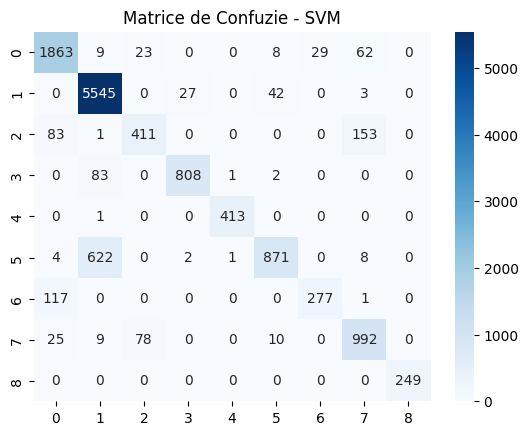

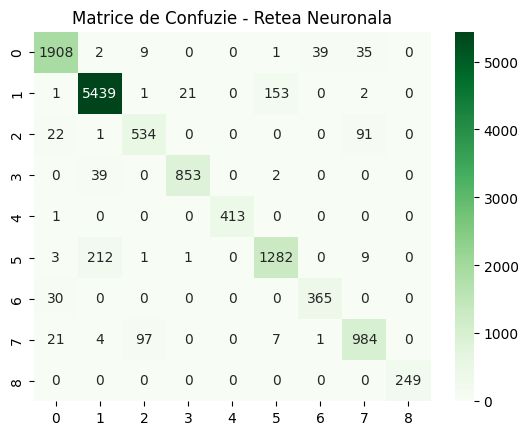

In [25]:
# Vizualizarea matricelor de confuzie:
import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_testare, y_predictie_svm), annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de Confuzie - SVM")
plt.show()

sns.heatmap(confusion_matrix(y_testare, y_predictie_nn), annot=True, fmt='d', cmap='Greens')
plt.title("Matrice de Confuzie - Retea Neuronala")
plt.show()

## Concluzii:

### 1. Care metoda s-a descurcat mai bine?

- Reteaua neuronala (MLPClassifier) a obtinut o acuratete mai mare (93.7%) comparativ cu SVM (89.0%)

- F1-Score general pentru MLP este mai mare decat cel al SVM atat in valorile macro (0.93 vs. 0.87), cat si weighted (0.94 vs. 0.88)

- Reteaua neuronala se descurca mai bine datorita capacitatii sale de a invata relatii mai complexe dintre benzile spectrale si clasele de etichete

- SVM este mai limitat in acest caz deoarece functioneaza bine pe seturi de date cu o dimensiune redusa a caracteristicilor, dar poate avea dificultati cu complexitatea inerenta a datelor hiperspectrale.

### 2. Cum au influentat caracteristicile imaginilor hiperspectrale performanta fiecarei metode?

#### Complexitatea spectrelor:

- Imaginile hiperspectrale contin 103 benzi spectrale, ceea ce adauga o dimensiune mare de complexitate.

- SVM, desi performant pe date mai simple, nu a putut exploata complet aceasta informatie spectrala.

#### Performanta pe clase mici si mari:

- Clasele cu suport mare (e.g., 1 - asfalt, 2 - iarba) sunt clasificate bine de ambele metode

- Clasele mai mici (e.g., 3 - pietris, 6 - sol gol) au scoruri mai scazute de F1 pentru SVM comparativ cu MLP